/var/folders/yv/kbb9q2f16z755yyqqbfpb7b00000gn/T/ipykernel_34980/1699315840.py:16: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  data = data.fillna(data.mean())



Accuracy: 0.9649122807017544

Confusion Matrix:
 [[39  1]
 [ 1 16]]

Classification Report:
               precision    recall  f1-score   support

           0       0.97      0.97      0.97        40
           1       0.94      0.94      0.94        17

    accuracy                           0.96        57
   macro avg       0.96      0.96      0.96        57
weighted avg       0.96      0.96      0.96        57


AUC-ROC: 0.9955882352941177

F1 Score: 0.9649122807017544

Recall: 0.9649122807017544

Precision: 0.9649122807017544

Balanced Accuracy: 0.9580882352941176

Cross-Validation Scores: [0.96153846 1.         0.98039216 0.98039216 0.96078431 0.98039216
 0.98039216 0.98039216 0.98039216 0.94117647]

Average Cross-Validation Score: 0.9745852187028659
AUC score: 0.9955882352941177
AUC score: 0.9955882352941177
Confusion matrix:


/Users/huzaifashafiq/miniforge3/envs/BMEN/lib/python3.8/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


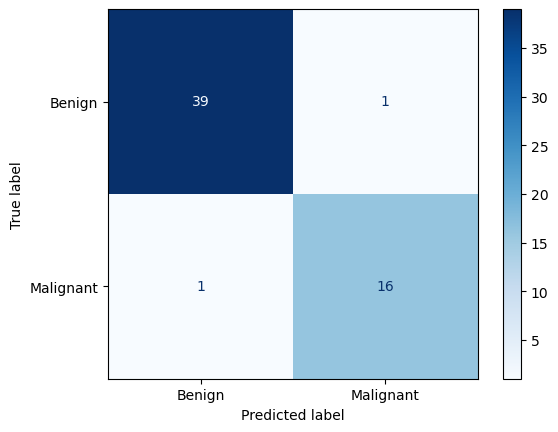

/Users/huzaifashafiq/miniforge3/envs/BMEN/lib/python3.8/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


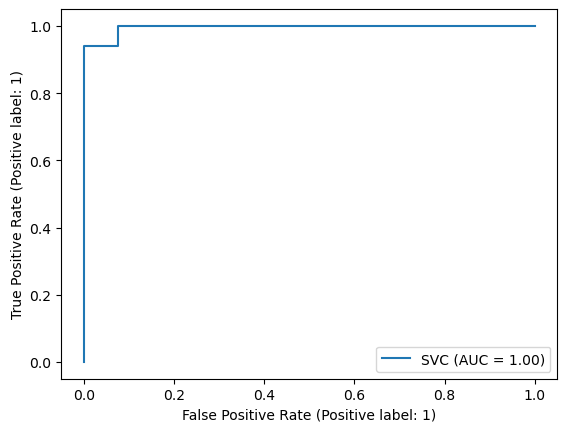

In [10]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
import matplotlib.pyplot as plt
from sklearn.metrics import (accuracy_score, confusion_matrix, classification_report, roc_auc_score, f1_score,
                             recall_score, precision_score, balanced_accuracy_score, matthews_corrcoef)
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import plot_confusion_matrix
from sklearn.model_selection import cross_val_score
from sklearn.metrics import plot_roc_curve

# Load data from CSV file
data = pd.read_csv("breast-cancer.csv")

# Fill missing values with the mean of the respective column
data = data.fillna(data.mean())

# Define the features and target variables
X = data.drop('diagnosis', axis=1)
y = data['diagnosis']

# Encoding the target variable
y = y.map({'M': 1, 'B': 0})

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)

# Create the Support Vector Machines (SVM) classifier
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
classifier = SVC(kernel='rbf', C=1.0, random_state=42, probability=True)

k = 10
cv_scores = cross_val_score(classifier, X_train_scaled, y_train, cv=k)

# Train the classifier using the training data
classifier.fit(X_train_scaled, y_train)

# Make predictions on the test data
y_pred = classifier.predict(X_test_scaled)

# Get predicted probabilities for the positive class
y_pred_proba = classifier.predict_proba(X_test_scaled)[:, 1]

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)
auc_roc = roc_auc_score(y_test, y_pred_proba)
f1 = f1_score(y_test, y_pred, average="weighted")
recall = recall_score(y_test, y_pred, average="weighted")
precision = precision_score(y_test, y_pred, average="weighted")
balanced_accuracy = balanced_accuracy_score(y_test, y_pred)
matthews_corr = matthews_corrcoef(y_test, y_pred)

# Print the results
print("\nAccuracy:", accuracy)
print("\nConfusion Matrix:\n", conf_matrix)
print("\nClassification Report:\n", class_report)
print("\nAUC-ROC:", auc_roc)
print("\nF1 Score:", f1)
print("\nRecall:", recall)
print("\nPrecision:", precision)
print("\nBalanced Accuracy:", balanced_accuracy)
print("\nCross-Validation Scores:", cv_scores)
print("\nAverage Cross-Validation Score:", cv_scores.mean())

auc_score = roc_auc_score(y_test, classifier.predict_proba(X_test_scaled)[:, 1])
print("AUC score:", auc_score)

print("Confusion matrix:")
plot_confusion_matrix(classifier, X_test_scaled, y_test, display_labels=['Benign', 'Malignant'], cmap=plt.cm.Blues)
plt.show()

# Plot ROC curve
plot_roc_curve(classifier, X_test_scaled, y_test)
plt.show()
